In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Analyzing AQI data**
*The city data has information for different indian cities along with different levels of key pollutants based on daily basis*

In [ ]:
#read city_day csv and convert it into a pandas dataframe
city_day = pd.read_csv('/kaggle/input/air-quality-data-in-india/city_day.csv')
city_day.head()

In [ ]:
city_day.info()

# Dealing with missing data

*Info() method shows that there are many columns in the dataset with null values. We can visualize the location of missing values using seaborn's heatmap*

In [ ]:
# Total missing values
mis_val = city_day.isnull().sum()

# Percentage of missing values per column
mis_val_percent = 100 * mis_val / len(city_day)
print('Total missing percentage per column is:')
print(mis_val_percent)

In [ ]:
# plot a heatmap using seaborn to visualize missing values
plt.figure(figsize=(10,8))
sns.heatmap(city_day.isnull(),yticklabels=False, cbar=False, cmap='tab20')

*This heatmap helps us to get an idea of the empty values in every column, the light blue color in the above heatmap shows that those values are null. **Xylene** appears to have the most missing values(60%) and **City and Date** column are completely filled*

*Before filling the missing values notice that the **Date** column in not an datetime object but a string, hence first we will convet it to datetime*

In [ ]:
# convert column to datetime
city_day['Date'] = pd.to_datetime(city_day['Date'])

*Imputing missing data with linear interpolation in both the directions as it will result in the best approximation for the missing data*

In [ ]:
# Interpolate using the linear method
city_day.interpolate(limit_direction="both",inplace=True)
city_day.head()

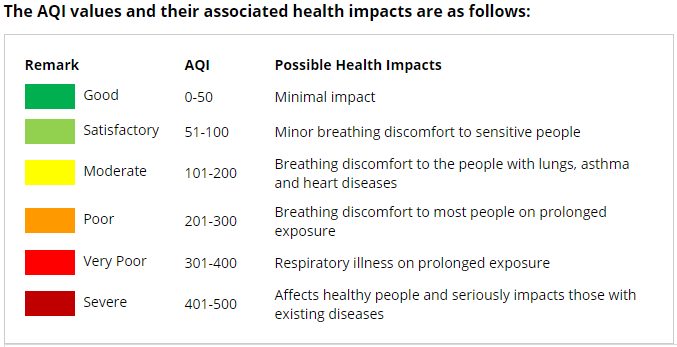

In [ ]:
# insert missing values in the AOI bucket column using the above table
def get_remark(aqi_val):
    if 0<=aqi_val<=50:
        return 'Good'
    if 51<=aqi_val<=100:
        return 'Satisfactory'
    if 101<=aqi_val<=200:
        return 'Moderate'
    if 201<=aqi_val<=300:
        return 'Poor'
    if 301<=aqi_val<=400:
        return 'Very Poor'
    if 401<=aqi_val<=500:
        return 'Severe'
    
city_day['AQI_Bucket'] = city_day['AQI'].map(get_remark)

In [ ]:
# plot a heatmap using seaborn to visualize missing values
plt.figure(figsize=(10,8))
sns.heatmap(city_day.isnull(),yticklabels=False, cbar=False, cmap='tab20')

*AQI_buckect column has a few entries which are still none as few of the values in the AQI column are beyound the range defined for the AQI_Bucket. We can either remove these rows or put severe as their value as they are anyways above the max limit* 

In [ ]:
# insert missing values in the AOI bucket column using the above table
def get_remark(aqi_val):
    if 0<=aqi_val<=50:
        return 'Good'
    if 51<=aqi_val<=100:
        return 'Satisfactory'
    if 101<=aqi_val<=200:
        return 'Moderate'
    if 201<=aqi_val<=300:
        return 'Poor'
    if 301<=aqi_val<=400:
        return 'Very Poor'
    if 401<=aqi_val<=500:
        return 'Severe'
    else:
        return 'Severe'
    
city_day['AQI_Bucket'] = city_day['AQI'].map(get_remark)

# plot a heatmap using seaborn to visualize missing values
# plt.figure(figsize=(10,8))
# sns.heatmap(city_day.isnull(),yticklabels=False, cbar=False, cmap='tab20')

# Percentage of missing values per column
mis_val_percent = 100 * city_day.isnull().sum() / len(city_day)
print('Total missing percentage per column is:')
print(mis_val_percent)

# **Cities included in the dataset**

In [ ]:
stations = pd.read_csv('/kaggle/input/air-quality-data-in-india/stations.csv')
stations.head()
# stations.info()

In [ ]:
# cities in the dataset
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

# cities with active stations
stations_cities = stations[stations['Status'] == 'Active']['City'].value_counts()
print(f'Total number of cities with active stations in the dataset : {len(stations_cities)}')
print(stations_cities.index)

# **Analysis of pollutants over the years**

*To verify if there is any seasonality in the level of pollutants we can analyse them on a monthly basis over the years*

In [ ]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
for pollutant in pollutants:
    city_day.plot.line(x='Date',y=pollutant,color='cornflowerblue')

1. *SO2 levels have shown a gradual increase since 2016-2018, Benzene, Toulene and Xylene levels have shown a rise in 2020.*
2. *PM2.5 and PM10 show a seasonal trend.*

***Lets see the pollutants level in different months***

In [ ]:
city_day['month'] = pd.DatetimeIndex(city_day['Date']).month
mth_dic = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
city_day['month']=city_day['month'].map(mth_dic)
city_day.groupby('month')[pollutants].mean().plot(figsize=(12,6), cmap='winter')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(np.arange(12), mth_dic.values())

1. *The monthy trend shows that the polutants level usually decreases during the monsoon months, i.e. from June to August*
2. *The particulate matter has the highest value during summer and winter*

# **Analysis for major cities before and after the lockdown**
Lets consider major cities like Ahmedabad,Delhi,Bengaluru,Mumbai,Hyderabad,Chennai for analysis

In [ ]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']
filter_city_date = city_day[city_day['Date'] >= '2019-01-01']
AQI = filter_city_date[filter_city_date.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

In [ ]:
import datetime
import matplotlib.dates as mdates
subplot_titles=["Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai']
x_line_annotation = datetime.date(2020, 3, 25)
f, axes = plt.subplots(6, 1, figsize=(15, 15), sharex=True)
for count, title in enumerate(subplot_titles):
    ax = AQI[AQI['City']==title].plot(x='Date', y='AQI', kind='line', ax=axes[count], color='cornflowerblue')
    ax.title.set_text(title)
    ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 5, 1)])
    ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.5, color='black')
    

*The lockdown in India was implemented from March 25, 2020 which is represented by a dashed line in the plot above. It clearly shows the AQI levels are reduced compared to the same time for previous year. This trend is shown by all the major cities in the country.*

In [ ]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.head()

AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']
AQI_beforelockdown = pd.DataFrame(AQI_beforeLockdown.mean())
AQI_afterlockdown = pd.DataFrame(AQI_afterLockdown.mean())
print(AQI_beforelockdown)
print(AQI_afterlockdown)

# *classifying cities into AQI bucket*
I have used Tableau software to visualize this data

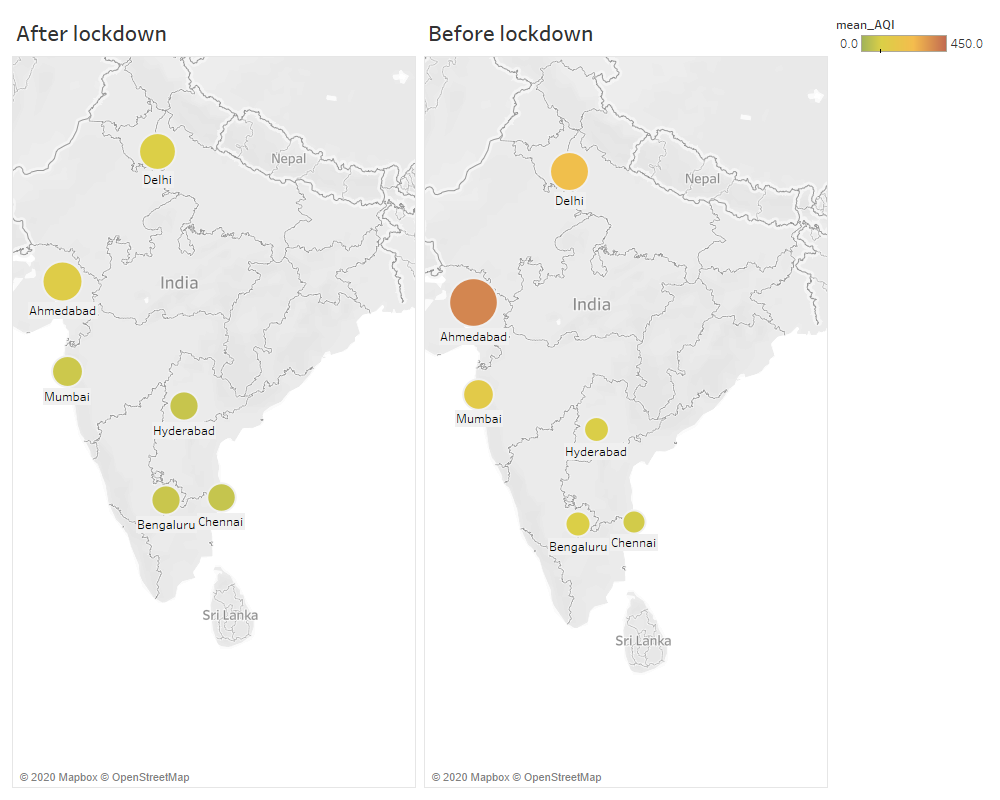

* The mean AQI value for Mumbai went from moderate(148.77) to satisfactory(73.89)
* The mean AQI value for Ahmedabad went from very poor(392.4) to moderate(127.8)
* The mean AQI value for Delhi went from poor(246.3) to moderate(107.27)
* The mean AQI value for Hyderabad went from moderate(94.43) to satisfactory(65.67)
* The mean AQI value for Bengaluru went from moderate(96) to satisfactory(68.4)
* The mean AQI value for Chennai went from moderate(80.31) to satisfactory(62.1)

# Clearly there is a difference in the AQI in India because of the lockdown imposed,so there is a silver lining after all.